In [39]:
from datetime import datetime, date
import talib as ta
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
from scipy import stats
import sklearn.metrics
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

Sonny Holman
Finland
HAMK
Entrepreneur

Remember to run the above code as well to enable the imports. TALIB is required to use this code.

Run the notebook below, enter the stock ticker symbol in the console that appears and press enter.

In [40]:
stock = input("Enter a stock ticker.")
userDate = input("Enter a starting date.")

data = web.DataReader(stock, data_source = "stooq", start = userDate, end = date.today())

#converts Date index into a dataframe column.

dates = []
for x in range(len(data)):
    newdate = str(data.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)
    
data['Date'] = dates

data

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2023-01-18,136.81500,138.61000,135.03000,135.21000,6.967280e+07,2023-01-18
2023-01-17,134.83000,137.29000,134.13000,135.94000,6.364663e+07,2023-01-17
2023-01-13,132.03000,134.92000,131.66000,134.76000,5.780972e+07,2023-01-13
2023-01-12,133.88000,134.26000,131.44000,133.41000,7.137965e+07,2023-01-12
2023-01-11,131.25000,133.51000,130.46000,133.49000,6.945895e+07,2023-01-11
...,...,...,...,...,...,...
2008-01-08,5.48208,5.55535,5.19994,5.21400,1.784589e+09,2008-01-08
2008-01-07,5.51837,5.58895,5.18189,5.40781,2.429591e+09,2008-01-07
2008-01-04,5.83072,5.87508,5.44619,5.48138,1.706308e+09,2008-01-04


Basic Chart & Preferred Indicator

Indicators Avaiable:

RSI
EMA
SMA
MACD
VWAP

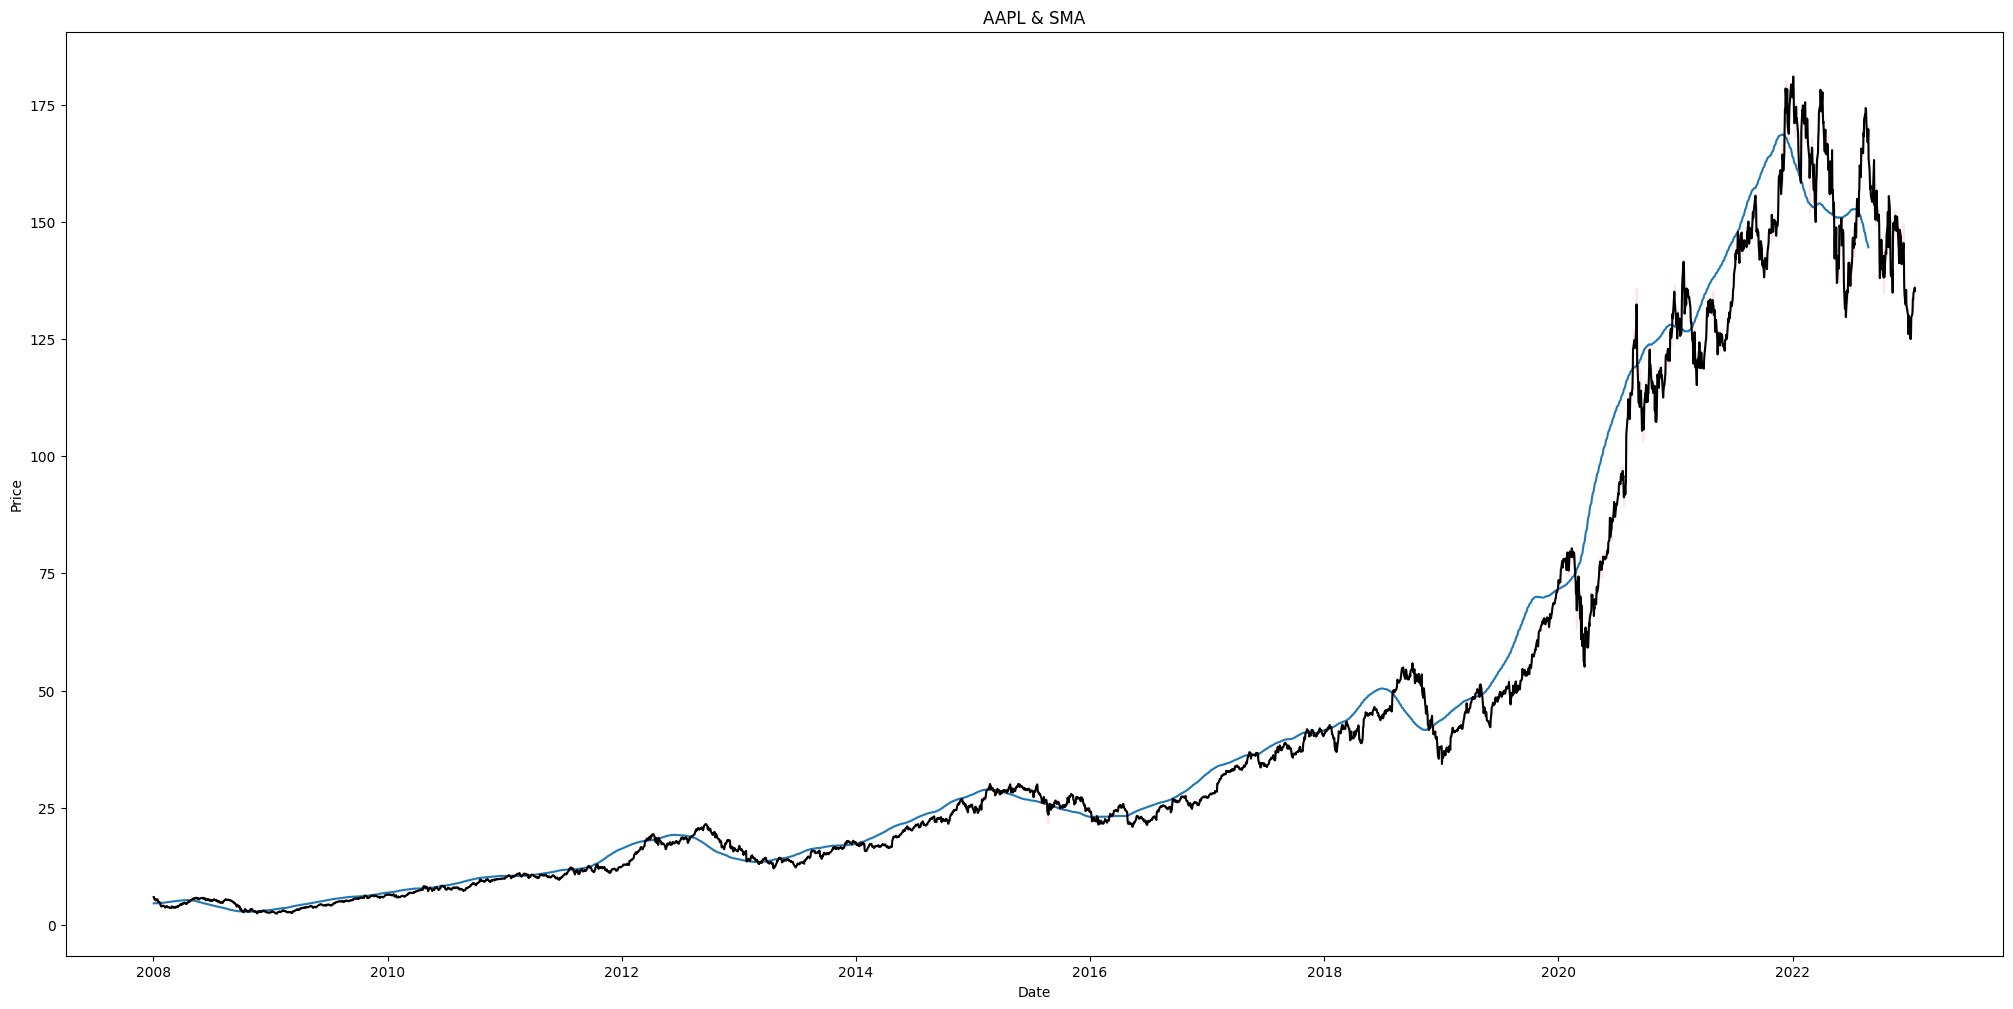

In [41]:
indicator = (input("Enter your preferred indicator."))

indicatortype = ""

#RSI
data['RSI'] = ta.RSI(data['Close'], 14)

#EMA
data['EMA_50'] = ta.EMA(data['Close'], 50)

#SMA_100
data['SMA_100'] = ta.SMA(data['Close'], 100)

#MACD
#data['MACD'] = ta.MACD(data['Close'], 12, 26, 9)

#VWAP
#data['VWAP'] = ta.VWAP(data['Close'])



def displaychart():
    plt.figure(figsize = (25, 12))
    plt.title(stock + " & " + indicator), 
    plt.xlabel('Date'),
    plt.ylabel('Price'),
    
    #replaces "" with '', this could be fixed or another alternative solution.
    final_indicatortype = indicatortype[0].replace("", '')
    
    plt.plot(data[str(final_indicatortype)], label = indicatortype)
    plt.plot(data['Open'], color = 'red', alpha = 0.1)
    plt.plot(data['Close'], color = 'black')
    plt.show()
    
    
if indicator == 'RSI':
        
    indicatortype = "RSI",
    displaychart()
        
if indicator == 'EMA':
        
    indicatortype = "EMA_50",
    displaychart()
        
if indicator == 'SMA':
        
    indicatortype = "SMA_100",
    displaychart()
        
if indicator == 'MACD':
        
    indicatortype = "MACD",
    displaychart()
        
if indicator == 'VWAP':
        
    indicatortype = 'VWAP',
    displaychart()

In [42]:
#Correlation
print(".Corr values of " + stock)
data.corr()

.Corr values of AAPL


C:\Users\sonny\AppData\Local\Temp\ipykernel_22944\1162256481.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Open,High,Low,Close,Volume,RSI,EMA_50,SMA_100
Open,1.000000,0.999908,0.999883,0.999753,-0.497617,0.099622,0.996199,0.991339
High,0.999908,1.000000,0.999866,0.999883,-0.496482,0.099922,0.996312,0.991463
Low,0.999883,0.999866,1.000000,0.999888,-0.499231,0.098864,0.996384,0.991430
Close,0.999753,0.999883,0.999888,1.000000,-0.497878,0.099605,0.996414,0.991465
Volume,-0.497617,-0.496482,-0.499231,-0.497878,1.000000,0.104091,-0.499356,-0.499341
RSI,0.099622,0.099922,0.098864,0.099605,0.104091,1.000000,0.033139,-0.002945
EMA_50,0.996199,0.996312,0.996384,0.996414,-0.499356,0.033139,1.000000,0.997962
SMA_100,0.991339,0.991463,0.991430,0.991465,-0.499341,-0.002945,0.997962,1.000000


Linear Regression Based Prediction

Dependent Variable = Adjusted Closing Price

Independent Variable = Opening Price

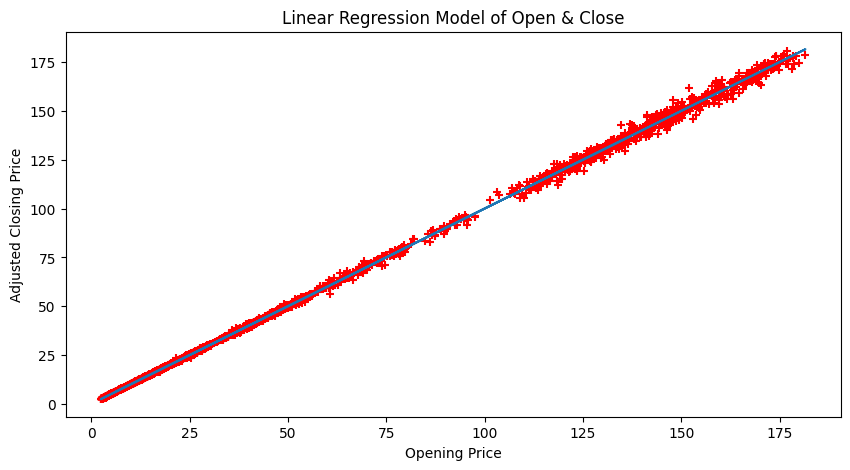

In [43]:
#Linear Regression model of Adjusted Closing Price & The Opening Price.
x = data['Open']
y = data['Close']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

model = list(map(myfunc, x))

plt.figure(figsize = (10, 5))
plt.title('Linear Regression Model of Open & Close')
plt.xlabel("Opening Price")
plt.ylabel("Adjusted Closing Price")
 
plt.scatter(x, y, color = 'red', marker ='+')
plt.plot(x, model)
plt.show()


Relationship (R)

In [44]:
print(r)

0.9997525252837253


Independent Variable = Volume

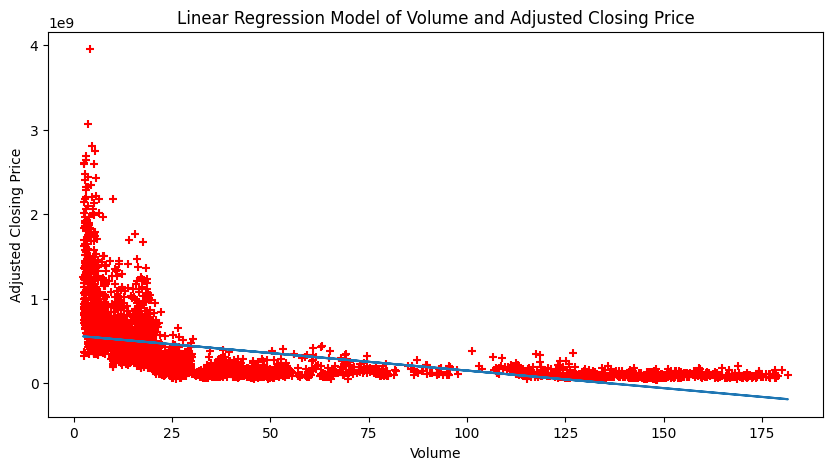

In [45]:
#Linear Regression model of Adjusted Closing Price & The Volume.
x1 = data['Open']
y1 = data['Volume']

slope, intercept, r1, p, std_err = stats.linregress(x1, y1)

def myfunc(x1):
    return slope * x1 + intercept

model = list(map(myfunc, x1))

plt.figure(figsize = (10, 5))
plt.title('Linear Regression Model of Volume and Adjusted Closing Price')
plt.xlabel("Volume")
plt.ylabel("Adjusted Closing Price")
 
plt.scatter(x1, y1, color = 'red', marker ='+')
plt.plot(x1, model)
plt.show()

In [46]:
#This r value indicates a weak relationship
print(r1)

-0.4976166699169035


Prediction of next day opening price.

In [47]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def mypredict(x):
    return slope * x + intercept

prediction = mypredict(data['Close'][1])

print("Predicted Next Day Opening Price:")
print(prediction)

print("Previous Adjusted Closing Price:")
print(data['Close'][1])

Predicted Next Day Opening Price:
135.99130316589753
Previous Adjusted Closing Price:
135.94


In [ ]:
print("Hello Github Update 5")